In [1]:
# !git init 
# !git remote add origin  "https://github.com/Rajashow/hippity-hoppity-your-data-is-my-property.git" 

In [2]:
# !git pull origin master


<h1 align="center">
Project
</h1>

In [50]:
import pandas as pd
from clean_data import *
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
import re

<h2 align="center">
Load data ⌛
</h2>

<p align="center">
<img src="https://media.giphy.com/media/8dYmJ6Buo3lYY/giphy.gif" width="40" height="40" />
</p>

In [2]:
df = pd.read_csv("data/loan_level_500k.csv",
                  index_col=19,
                  low_memory=False)
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,WV,SF,26100.0,P,320,2.0,Other sellers,Other servicers,True,False
F199Q1000005,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,OH,SF,45200.0,N,360,1.0,Other sellers,Other servicers,True,False
F199Q1000007,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,OH,SF,44700.0,P,319,1.0,Other sellers,Other servicers,True,False
F199Q1000013,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,AZ,SF,85200.0,N,318,2.0,Other sellers,Other servicers,True,False
F199Q1000015,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,OH,SF,44200.0,N,317,2.0,Other sellers,Other servicers,True,False


<h2 align="center">
 Tidy Data 🧹
</h2>
<p align="center">
<img src="https://media.giphy.com/media/119LVmecQWrzlm/giphy.gif" width="40" height="40" />
</p>

In [3]:
df[["MATURITY_DATE","FIRST_PAYMENT_DATE"]].head()

,MATURITY_DATE,FIRST_PAYMENT_DATE
LOAN_SEQUENCE_NUMBER,,
F199Q1000004,202901,200206
F199Q1000005,202903,199904
F199Q1000007,202902,200208
F199Q1000013,202902,200209
F199Q1000015,202902,200210


In [4]:
df =  tidy_data(df)
df.head()

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT,MATURITY_YEAR,MATURITY_MON,FIRST_PAYMENT_YEAR,FIRST_PAYMENT_MON
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,N,NaN,0.0,1.0,O,80.0,33.0,162000,80.0,...,320,2.0,Other sellers,Other servicers,True,0,2029,1,2002,6
F199Q1000005,732.0,N,17140.0,0.0,1.0,O,25.0,10.0,53000,25.0,...,360,1.0,Other sellers,Other servicers,True,0,2029,3,1999,4
F199Q1000007,679.0,N,15940.0,30.0,1.0,O,91.0,48.0,133000,91.0,...,319,1.0,Other sellers,Other servicers,True,0,2029,2,2002,8
F199Q1000013,721.0,N,38060.0,0.0,1.0,O,39.0,13.0,174000,39.0,...,318,2.0,Other sellers,Other servicers,True,0,2029,2,2002,9
F199Q1000015,618.0,N,10420.0,25.0,1.0,O,85.0,24.0,122000,85.0,...,317,2.0,Other sellers,Other servicers,True,0,2029,2,2002,10


<h2 align="center">
Missing data 😱
</h2>

(<matplotlib.axes._subplots.AxesSubplot at 0x14d2dff7c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14d2eb6fe48>)

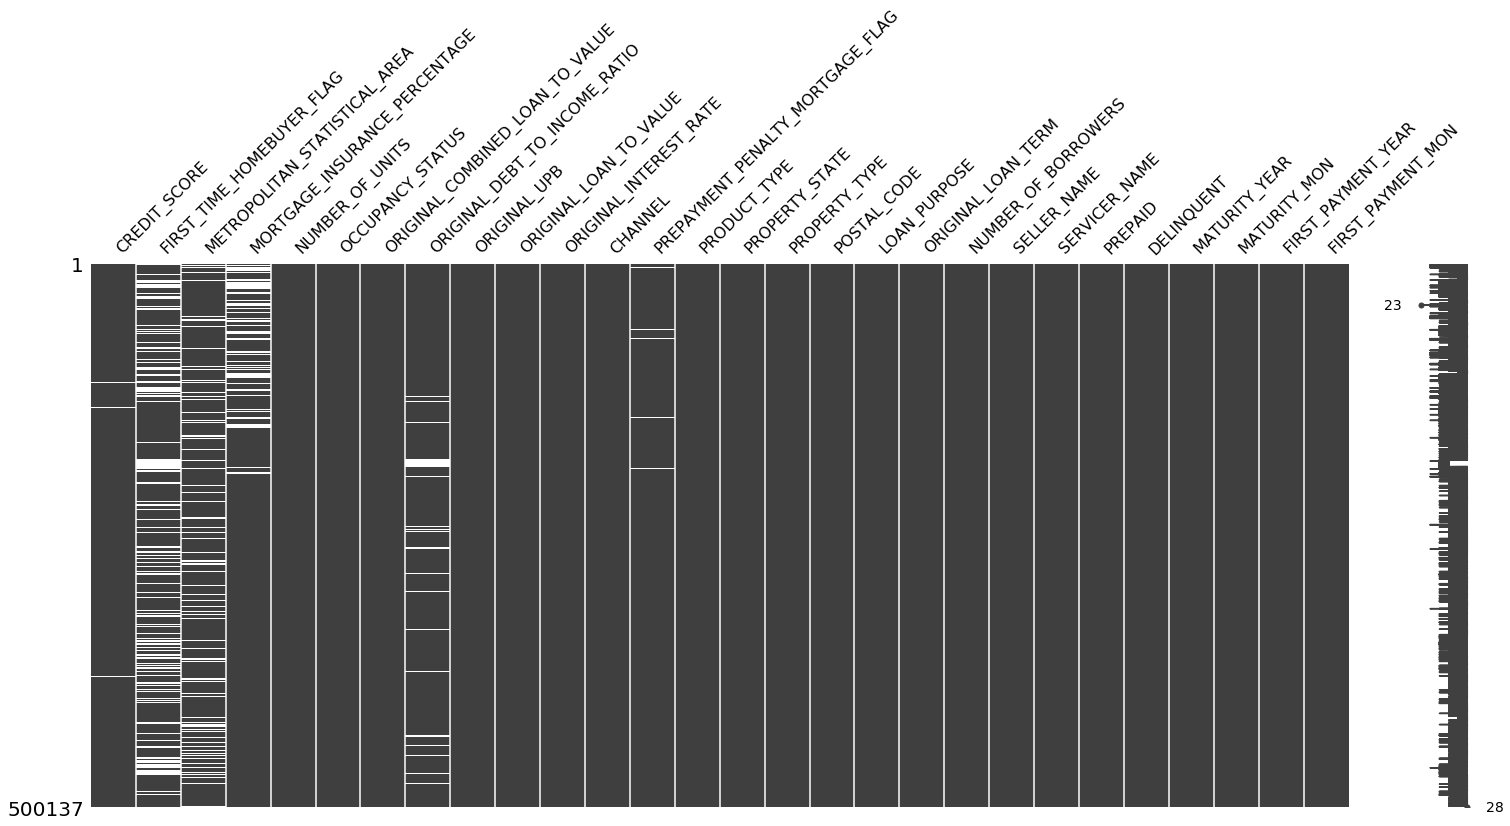

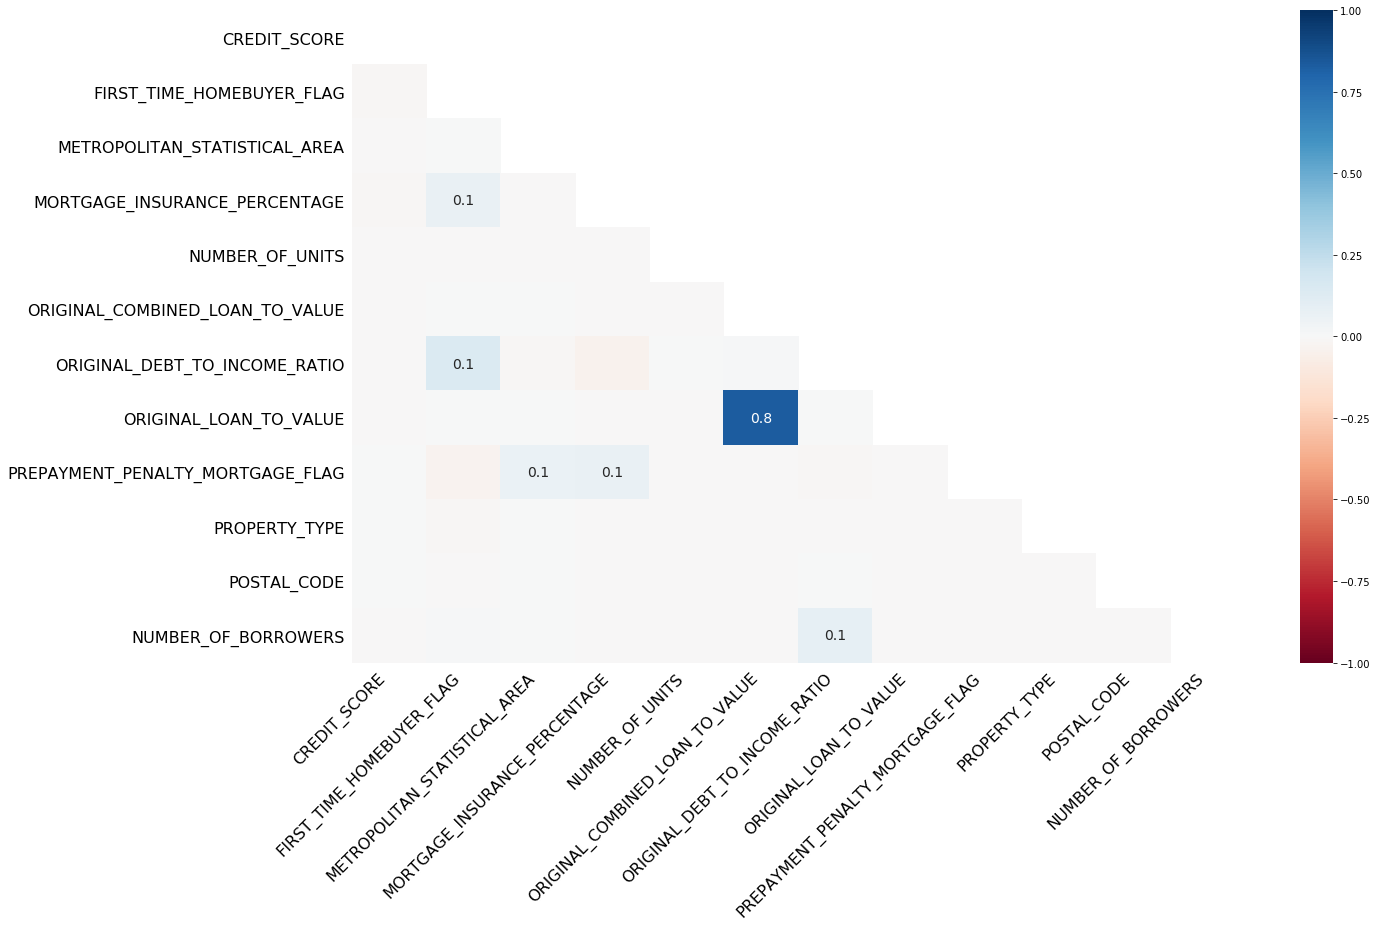

In [51]:
msno.matrix(df),msno.heatmap(df)

<h2 align="center">
 Fill missing data and convert categorical data to dummies 🧰
</h2>

In [22]:
train, test, encoder = get_train_test_split_for_ml(df,2000,True,True)

In [ ]:
# pepaid is bad

(<matplotlib.axes._subplots.AxesSubplot at 0x1f52d875c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f4d292fbc8>)

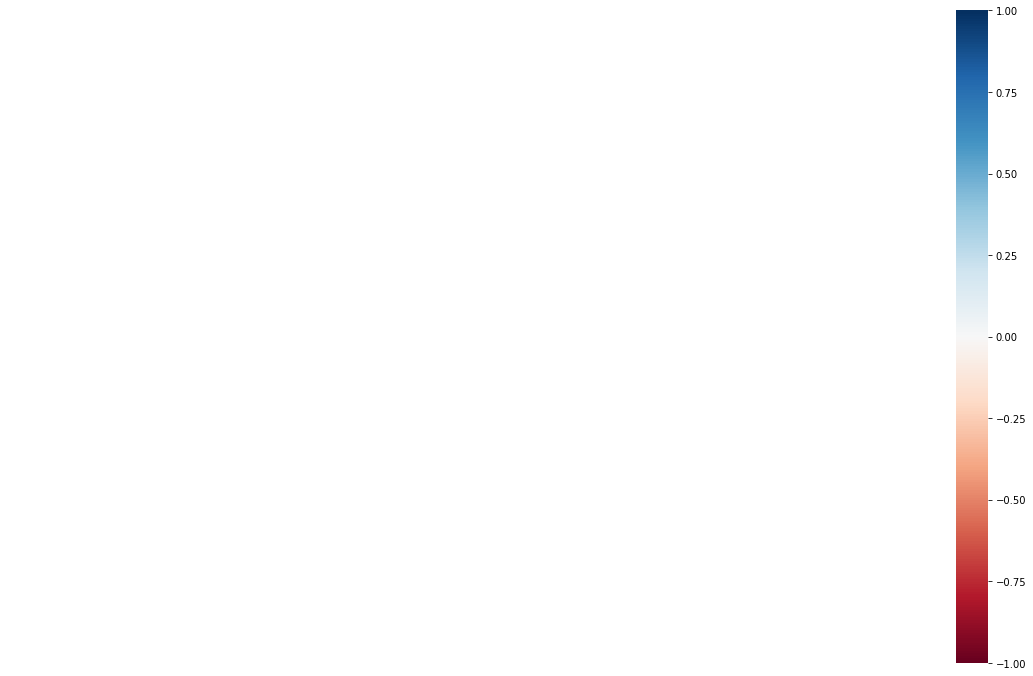

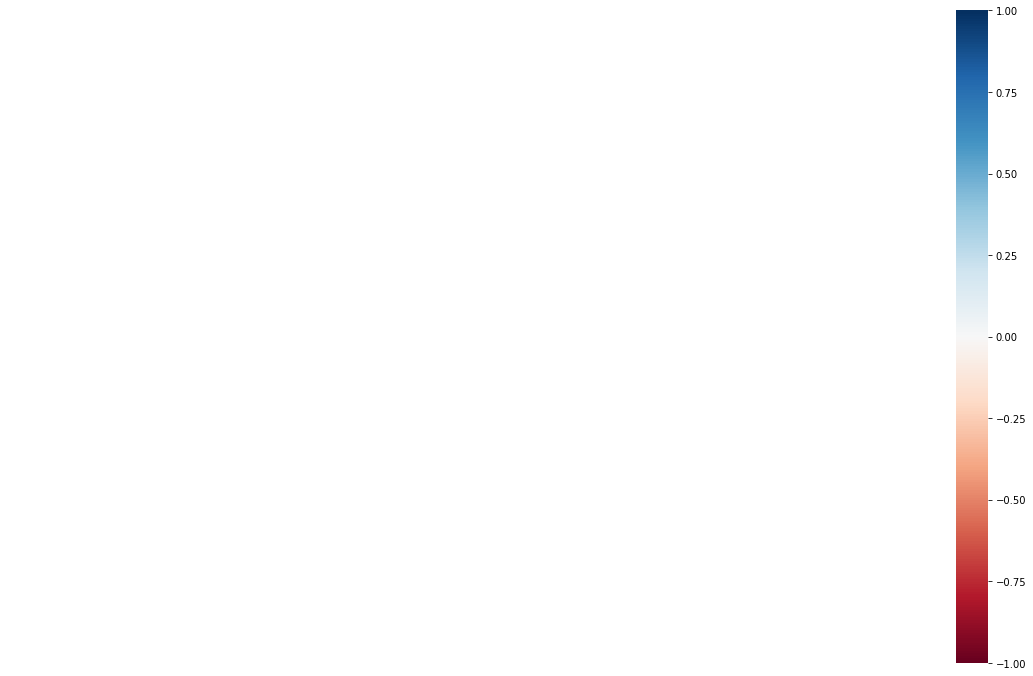

In [29]:
msno.heatmap(train),msno.heatmap(test)

In [31]:
train.head()

,CREDIT_SCORE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,...,"x9_HOMESIDELENDING,INC","x9_JPMORGANCHASEBANK,NA",x9_NATLCITYMTGECO,x9_Other servicers,x9_PRINCIPALRESIDENTIAL,"x9_SUNTRUSTMORTGAGE,INC",x9_WASHINGTONMUTUALBANK,"x9_WELLSFARGOBANK,NA",x9_WELLSFARGOHOMEMORTGA,Missing_NUMBER_OF_UNITS
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000005,732.0,17140.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,45200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
F199Q1000032,765.0,49700.0,0.0,1.0,50.0,26.0,112000,50.0,6.625,95900.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
F199Q1000036,787.0,12060.0,0.0,1.0,80.0,18.0,124000,80.0,6.750,30500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
F199Q1000037,730.0,16620.0,30.0,1.0,94.0,29.0,138000,94.0,7.000,25300.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
F199Q1000041,706.0,33340.0,30.0,1.0,93.0,28.0,103000,93.0,7.125,53200.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [33]:
test.head()

,CREDIT_SCORE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,...,x9_GMACMTGECORP,"x9_HOMESIDELENDING,INC","x9_JPMORGANCHASEBANK,NA",x9_NATLCITYMTGECO,x9_Other servicers,x9_PRINCIPALRESIDENTIAL,"x9_SUNTRUSTMORTGAGE,INC",x9_WASHINGTONMUTUALBANK,"x9_WELLSFARGOBANK,NA",x9_WELLSFARGOHOMEMORTGA
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,16974.0,0.0,1.0,80.0,33.0,162000,80.0,7.120,26100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000007,679.0,15940.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,44700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000013,721.0,38060.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,85200.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000015,618.0,10420.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,44200.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F199Q1000016,738.0,10420.0,0.0,1.0,73.0,44.0,218000,73.0,6.000,44300.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<h2 align="center">
 EDA 🤠
</h2>
<p align="center">
<img src="https://media.giphy.com/media/l4KibOaou932EC7Dy/giphy.gif" width="40" height="40" />

</p>

In [12]:
reg = logit('DELINQUENT ~ CREDIT_SCORE+FIRST_TIME_HOMEBUYER_FLAG+METROPOLITAN_STATISTICAL_AREA+MORTGAGE_INSURANCE_PERCENTAGE+NUMBER_OF_UNITS+OCCUPANCY_STATUS+ORIGINAL_COMBINED_LOAN_TO_VALUE+ORIGINAL_DEBT_TO_INCOME_RATIO+ORIGINAL_UPB+ORIGINAL_LOAN_TO_VALUE+ORIGINAL_INTEREST_RATE+CHANNEL+PREPAYMENT_PENALTY_MORTGAGE_FLAG+PRODUCT_TYPE+PROPERTY_TYPE+POSTAL_CODE+LOAN_PURPOSE+ORIGINAL_LOAN_TERM+NUMBER_OF_BORROWERS+SELLER_NAME+SERVICER_NAME', df)
reg_fit = reg.fit()
reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.119220
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DELINQUENT   No. Observations:               280973
Model:                          Logit   Df Residuals:                   280875
Method:                           MLE   Df Model:                           97
Date:                Tue, 12 May 2020   Pseudo R-squ.:                  0.2152
Time:                        17:57:15   Log-Likelihood:                -33497.
converged:                       True   LL-Null:                       -42681.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.3408      1.864     -2.328      0.020      -7.995      -0.687
FIRST_TIME_HOMEBUYER_FLAG[T.Y]           -0.0245        nan        nan        nan         nan         nan
OCCUPANCY_STATUS[T.O]                    -0.4215        nan        nan        nan         nan         nan
OCCUPANCY_STATUS[T.S]                    -0.2497      0.260     -0.960      0.337      -0.760       0.260
CHANNEL[T.C]                             -0.9752      1.046     -0.932      0.351      -3.025       1.075
CHANNEL[T.R]                             -0.6559        nan        nan        nan         nan         nan
CHANNEL[T.T]                             -0.5190      0.633     -0.820      0.412      -1.759       0.721
PREPAYMENT_PENALTY_MORTGAGE_FLAG[T.Y]    -0.2724      0.172     -1.588      0.112      -0.609       0.064
PROPERTY_TYPE[T.CP]                      -0.3939      0.755     -0.522      0.602      -1.873       1.085
PROPERTY_TYPE[T.LH]                       1.3517      0.439      3.076      0.002       0.490       2.213
PROPERTY_TYPE[T.MH]                       1.0797        nan        nan        nan         nan         nan
PROPERTY_TYPE[T.PU]                       0.4752      0.068      6.954      0.000       0.341       0.609
PROPERTY_TYPE[T.SF]                       0.6086      0.107      5.675      0.000       0.398       0.819
LOAN_PURPOSE[T.N]                        -0.1939      0.033     -5.815      0.000      -0.259      -0.129
LOAN_PURPOSE[T.P]                        -0.5536        nan        nan        nan         nan         nan
SELLER_NAME[T.ACCUBANC MORTGAGE CO]      -0.3537      0.279     -1.269      0.204      -0.900       0.192
SELLER_NAME[T.BANKAMERICA MORTGAGE]      -0.6924      0.360     -1.924      0.054      -1.398       0.013
SELLER_NAME[T.BANKOFAMERICA,NA]          -1.0311      0.089    -11.568      0.000      -1.206      -0.856
SELLER_NAME[T.BISHOP'S GATE RESIDE]      -0.7276      0.119     -6.117      0.000      -0.961      -0.495
SELLER_NAME[T.BISHOPSGATERESIDENTI]      -1.3944      0.013   -107.328      0.000      -1.420      -1.369
SELLER_NAME[T.BRANCHBANKING&TRUSTC]      -1.9221      0.385     -4.998      0.000      -2.676      -1.168
SELLER_NAME[T.CHASE MANHATTAN MORT]      -0.0633      0.151     -0.418      0.676      -0.360       0.233
SELLER_NAME[T.CHASEMANHATTANMTGECO]      -0.0719      0.141     -0.511      0.609      -0.347       0.204
SELLER_NAME[T.COUNTRYWIDE]                0.0039      0.189      0.021      0.984      -0.367       0.375
SELLER_NAME[T.COUNTRYWIDE HOME LOA]       0.4871        nan        nan        nan         nan         nan
SELLER_NAME[T.CROSSLAND MORTGAGE C]      -0.1509      0.218     -0.693      0.488      -0.578       0.276
SELLER_NAME[T.CROSSLANDMTGECORP]         -0.3069      0.277     -1.109      0.267      -0.849       0.235
SELLER_NAME[T.FIFTHTHIRDBANK]            -1.8185      0.414  

<h2 align="center">
 Hypothesis testing 🔬
</h2>
<p align="center">
<img src="https://media.giphy.com/media/7MZ0v9KynmiSA/source.gif" width="40" height="40" />
</p>

<h2 align="center">
 Machine learning 🤖
</h2>
<p align="center">
<img src="https://media.giphy.com/media/ckJF143W1gBS8Hk833/source.gif
" width="40" height="40" />
</p>

<h2 align="center">
 Conclusion 👋
</h2>
<p align="center">
<img src="https://media.giphy.com/media/jUwpNzg9IcyrK/source.gif" width="40" height="40" />
</p>